# MNIST Classification 


In this lesson we discuss in how to create a simple IPython Notebook to solve
an image classification problem. MNIST contains a set of pictures


## Import Libraries 

Note: https://python-future.org/quickstart.html

In [1]:
# from __future__ import absolute_import
# from __future__ import division
# from __future__ import print_function
try:
    from cloudmesh.common.StopWatch import StopWatch
except:  # noqa: E722
    ! pip install cloudmesh-common
    from cloudmesh.common.StopWatch import StopWatch

StopWatch.start('import')
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout
from keras.utils import to_categorical, plot_model
from keras.datasets import mnist
StopWatch.stop('import')

## Warm Up Exercise

## Pre-process data

### Load data 

First we load the data from the inbuilt mnist dataset from Keras
Here we have to split the data set into training and testing data. 
The training data or testing data has two components. 
Training features and training labels. 
For instance every sample in the dataset has a corresponding label. 
In Mnist the training sample contains image data represented in terms of 
an array. The training labels are from 0-9. 

Here we say x_train for training data features and y_train as the training labels. Same goes for testing data. 

In [10]:
StopWatch.start('data load')
(x_train, y_train), (x_test, y_test) = mnist.load_data()

### Identify Number of Classes

As this is a number classification problem. We need to know how many classes are there. 
So we'll count the number of unique labels. 

In [11]:
num_labels = len(np.unique(y_train))
num_labels

10

### Convert Labels To One-Hot Vector

Read more on one-hot vector. 

In [12]:
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)


## Image Reshaping

The training model is designed by considering the data as a vector.
This is a model dependent modification. Here we assume the image is
a squared shape image.

In [13]:
image_size = x_train.shape[1]
input_size = image_size * image_size

## Resize and Normalize

The next step is to continue the reshaping to a fit into a vector
and normalize the data. Image values are from 0 - 255, so an 
easy way to normalize is to divide by the maximum value. 


In [14]:
x_train = np.reshape(x_train, [-1, input_size])
x_train = x_train.astype('float32') / 255
x_test = np.reshape(x_test, [-1, input_size])
x_test = x_test.astype('float32') / 255
StopWatch.stop('data load')

## Create a Keras Model

Keras is a neural network library. The summary function provides tabular summary on the model you created. And the plot_model function provides a grpah on the network you created. 

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                50240     
                                                                 
 dense_1 (Dense)             (None, 10)                650       
                                                                 
 activation (Activation)     (None, 10)                0         
                                                                 
Total params: 50,890
Trainable params: 50,890
Non-trainable params: 0
_________________________________________________________________


2022-07-14 11:58:30.644676: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


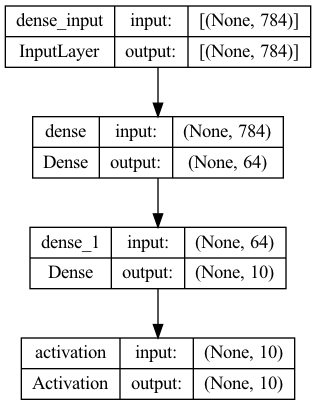

In [7]:
StopWatch.start('total')

# Create Model
# network parameters
batch_size = 4
hidden_units = 64

model = Sequential()
model.add(Dense(hidden_units, input_dim=input_size))
model.add(Dense(num_labels))
model.add(Activation('softmax'))
model.summary()
plot_model(model, to_file='mlp-mnist.png', show_shapes=True)
StopWatch.stop('total')

## Compile and Train

A keras model need to be compiled before it can be used to train
the model. In the compile function, you can provide the optimization
that you want to add, metrics you expect and the type of loss function
you need to use. 

Here we use adam optimizer, a famous optimizer used in neural networks. 

The loss funtion we have used is the categorical_crossentropy. 

Once the model is compiled, then the fit function is called upon passing the number of epochs, traing data and batch size. 

The batch size determines the number of elements used per minibatch in optimizing the function. 

**Note: Change the number of epochs, batch size and see what happens.**



In [8]:
StopWatch.start('compile')
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])
StopWatch.stop('compile')

StopWatch.start('train')
model.fit(x_train, y_train, epochs=3, batch_size=batch_size)
StopWatch.stop('train')

Epoch 1/3
15000/15000 [==============================] - 13s 864us/step - loss: 0.3713 - accuracy: 0.8945
Epoch 2/3
15000/15000 [==============================] - 13s 875us/step - loss: 0.3184 - accuracy: 0.9118
Epoch 3/3
15000/15000 [==============================] - 12s 783us/step - loss: 0.3068 - accuracy: 0.9141


## Testing 

Now we can test the trained model. Use the evaluate function by passing
test data and batch size and the accuracy and the loss value can be retrieved.

**MNIST_V1.0|Exercise: Try to observe the network behavior by changing the number of epochs, batch size and record the best accuracy that you can gain. Here you can record what happens when you change these values. Describe your observations in 50-100 words.**


In [9]:
loss, acc = model.evaluate(x_test, y_test, batch_size=batch_size)
print("\nTest accuracy: %.1f%%" % (100.0 * acc))

2500/2500 [==============================] - 2s 600us/step - loss: 0.3037 - accuracy: 0.9172

Test accuracy: 91.7%


## Final Note

This programme can be defined as a hello world programme in deep
learning. Objective of this exercise is not to teach you the depths of
deep learning. But to teach you basic concepts that may need to design a
simple network to solve a problem. Before running the whole code, read
all the instructions before a code section. 

## Homework

**Solve Exercise MNIST_V1.0.**


### Reference: 

[Orignal Source to Source Code](https://github.com/PacktPublishing/Advanced-Deep-Learning-with-Keras)
